## City of Chicago Hiring Dashboard Data Munge
- created 3-28-22: GTP
- i've been given a few datasets by the city of chicago, and i'd like to see what's going on inside
- see: https://docs.google.com/document/d/1z3wN1-KM9gLncPp43xlFoDGGRDh49J1IKd_6-H5Vk34/edit for notes

In [1]:
import pandas as pd
pd.options.display.max_columns = 300
pd.options.display.max_rows = 100

In [11]:
from pandas_profiling import ProfileReport

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### requisition_all_new data

In [2]:
req_df = pd.read_csv('../data/Requisition_all_New.csv')

In [17]:
### convert dates to datetime
req_df['Req. Creation Date'] = pd.to_datetime(req_df['Req. Creation Date'])
req_df['Latest Filled Date'] = pd.to_datetime(req_df['Latest Filled Date'])
req_df['Internal Closing Date'] = pd.to_datetime(req_df['Internal Closing Date'])
req_df['Internal Opening Date'] = pd.to_datetime(req_df['Internal Opening Date'])

In [19]:
req_df['days_between_open_and_close'] = (req_df['Internal Closing Date'] - req_df['Internal Opening Date']).dt.days

In [25]:
req_df['days_between_open_and_close'].max()

162.0

<AxesSubplot:xlabel='days_between_open_and_close', ylabel='Count'>

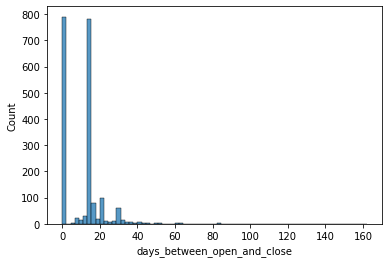

In [26]:
sns.histplot(data=req_df, x="days_between_open_and_close")

In [12]:
req_df_prof = ProfileReport(req_df)
req_df_prof.to_file(output_file='req_profile.html')

Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 609.73it/s]


In [10]:
req_df['Current Status'].value_counts()

Sourcing    777
Approved    714
Filled      648
Draft       544
Canceled    220
Name: Current Status, dtype: int64

In [ ]:
req_df['Current Status'].value_counts()

### VACANCIES data

In [5]:
vacancies_df = pd.read_csv('../data/VACANCY_ID_LIST/VACANCIES-Table 1.csv')

In [13]:
vacancies_df_prof = ProfileReport(vacancies_df)
vacancies_df_prof.to_file(output_file='vacancies_profile.html')

Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 614.28it/s]


### Req number data

In [8]:
req_num_df = pd.read_csv('../data/VACANCY_ID_LIST/REQUEST NUMBER-Table 1.csv')

In [9]:
req_num_df.sample(5)

,Department,Request Number,Vacancy Name,Requisition Number,Title Code,Title,Depmartment Contact
2159,59.0,059-2021-098,8812-0007-2021,349759,8812,LIEUTENANT-PARAMEDIC,KEYANNA HAMMOND
3635,91.0,091-2021-067,0501-0007-2021,349778,0501,LIBRARIAN I,JULIE MORGAN
2314,70.0,070-2021-023,1208-0002-2021,355968,1208,LABOR STANDARDS INVESTIGATOR,TAMARA L JOINER
2216,60.0,060-2021-002,1646-0001-2021,346757,1646,ATTORNEY,Karlo Flowers
748,31.0,031-2022-064,0875-0002-2022,361264,0875,SR LEGAL PERSONAL COMPUTER OPERATOR,L SCOTT-LEVY


In [ ]:
vacancies_df_prof = ProfileReport(vacancies_df)
vacancies_df_prof.to_file(output_file='vacancies_profile.html')